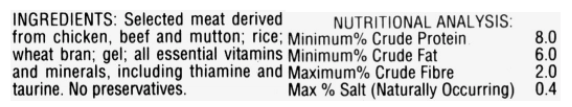

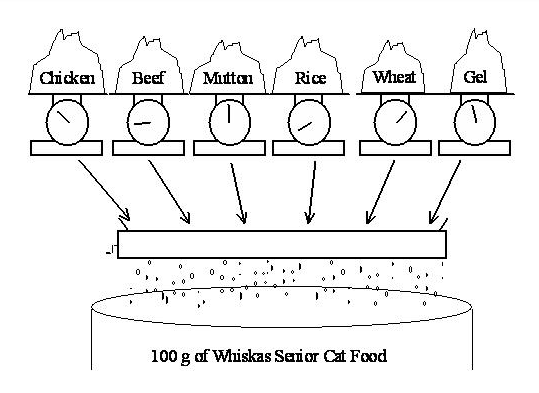

- The costs of the **chicken, beef, and mutton** are \<span class="mark">$0.013, \$0.008 and \$0.010</span> respectively, 

- While the costs of the **rice, wheat and gel** are \<span class="mark">$0.002, \$0.005 and \$0.001</span> respectively. 

(All costs are per gram.) For this exercise we will ignore the vitamin and mineral ingredients. (Any costs for these are likely to be very small anyway.)

Each ingredient contributes to the total weight of protein, fat, fibre and salt in the final product. The contributions (in grams) per gram of ingredient are given in the table below.

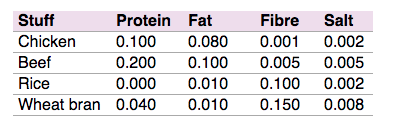

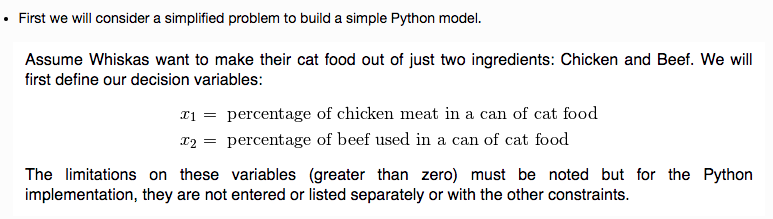

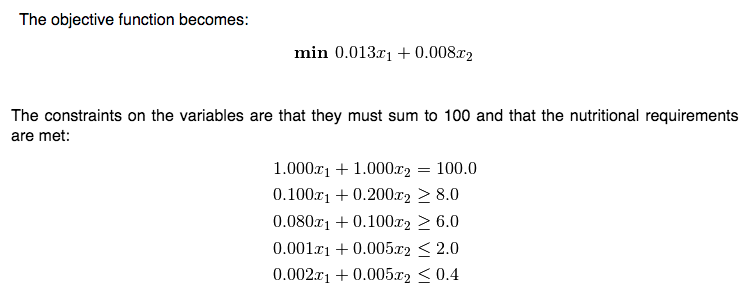

In [1]:
import pandas as pd
import pyomo.environ as pyomo
from pyomo.environ import *

In [3]:
def read_excel(filename):
    """Read special Excel spreadsheet to input dict. 
    
    Args:
        filename: path to a spreadsheet file
        
    Returns
        dict of DataFrames, to be passed to create_model()
    """
    with pd.ExcelFile(filename) as xls:
        producto = xls.parse('Producto').set_index('Ingrediente')
        contribucion = xls.parse('Contribucion').set_index('Stuff')
        requerimientos = xls.parse('Nutricional').set_index("NutritionalAnalysis")
        
    data = {
        'Varproducto': producto,
        'contribucion': contribucion,
        'requeri': requerimientos}

    return data

In [4]:
Datos = read_excel('Whiskas.xlsx')

In [5]:
Datos["Varproducto"]

,Precio
Ingrediente,
Chicken,0.013
Beef,0.008
Mutton,0.010
Rice,0.002
Wheat,0.005
Gel,0.001


In [6]:
Datos["contribucion"]

,Protein,Fat,Fibre,Salt
Stuff,,,,
Chicken,0.10,0.08,0.001,0.002
Beef,0.20,0.10,0.005,0.005
Mutton,0.15,0.11,0.003,0.007
Rice,0.00,0.01,0.100,0.002
Wheat,0.04,0.01,0.150,0.008
Gel,0.00,0.00,0.000,0.000


In [7]:
Datos["requeri"]

,Porcentaje
NutritionalAnalysis,
Protein,8.0
Fat,6.0
Fibre,2.0
Salt,0.4


In [8]:
# Variables a optimizar pollo carne arroz etc.
Ingredients =  list(Datos["Varproducto"].index)
Ingredients

['Chicken', 'Beef', 'Mutton', 'Rice', 'Wheat', 'Gel']

In [9]:
Varproducto = Datos["Varproducto"]
#Varproducto.Precio

In [10]:
model = ConcreteModel(name="The Whiskas Problem")

model.ingredient_vars = Var(Ingredients, bounds=(0,None), doc="The amount of each ingredient that is used")

model.obj = Objective(expr=sum(Varproducto.Precio[i]*model.ingredient_vars[i] for i in Ingredients),sense=minimize, doc="Total Cost of Ingredients per can")



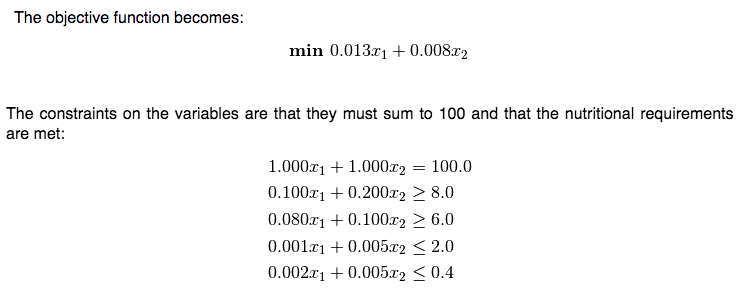

In [11]:
model.c0 = Constraint(expr=sum(model.ingredient_vars[i] for i in Ingredients) == 100, doc="PercentagesSum")

In [12]:
model.c1 = Constraint(expr=sum(Datos["contribucion"]["Protein"][i] * model.ingredient_vars[i] for i in Ingredients) >= 8.0, doc="ProteinRequirement")
model.c2 = Constraint(expr=sum(Datos["contribucion"]["Fat"][i] * model.ingredient_vars[i] for i in Ingredients) >= 6.0, doc="FatRequirement")
model.c3 = Constraint(expr=sum(Datos["contribucion"]["Fibre"][i] * model.ingredient_vars[i] for i in Ingredients) <= 2.0, doc="FibreRequirement")
model.c4 = Constraint(expr=sum(Datos["contribucion"]["Salt"][i] * model.ingredient_vars[i] for i in Ingredients) <= 0.4, doc="SaltRequirement")

In [13]:
solver = SolverFactory('ipopt')
status = solver.solve(model)

print("Status = %s" % status.solver.termination_condition)

for i in Ingredients:
    print("%s = %f" % (model.ingredient_vars[i], value(model.ingredient_vars[i])))

print("Objective = %f" % value(model.obj))

Status = optimal
ingredient_vars[Chicken] = 0.000000
ingredient_vars[Beef] = 59.999996
ingredient_vars[Mutton] = 0.000002
ingredient_vars[Rice] = 0.000012
ingredient_vars[Wheat] = 0.000001
ingredient_vars[Gel] = 39.999989
Objective = 0.520000
